# An Autoencoder implemented in Python using the MNIST dataset

>This code first loads the MNIST dataset and normalizes the pixel values to be between 0 and 1. The data is then reshaped to a 1D array, as required for the Autoencoder model.

>The Autoencoder model is defined with an input layer, encoding layer, and decoding layer. The encoding layer has a smaller dimensionality than the input layer, allowing it to learn a compressed representation of the input data. The decoding layer reconstructs the original data from the compressed representation. The model is compiled with binary crossentropy loss and Adam optimizer.

>The model is trained on the training set for 50 epochs with a batch size of 256. After training, the model is used to predict the reconstructed data from the test set. Some original and reconstructed images from the test set are then plotted for visualization.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 16s 54ms/step - loss: 0.2763 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 6s 28ms/step - loss: 0.1699 - val_loss: 0.1523
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1430 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1277 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1178 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1109 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1057 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1020 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 10/50
235/235 [====

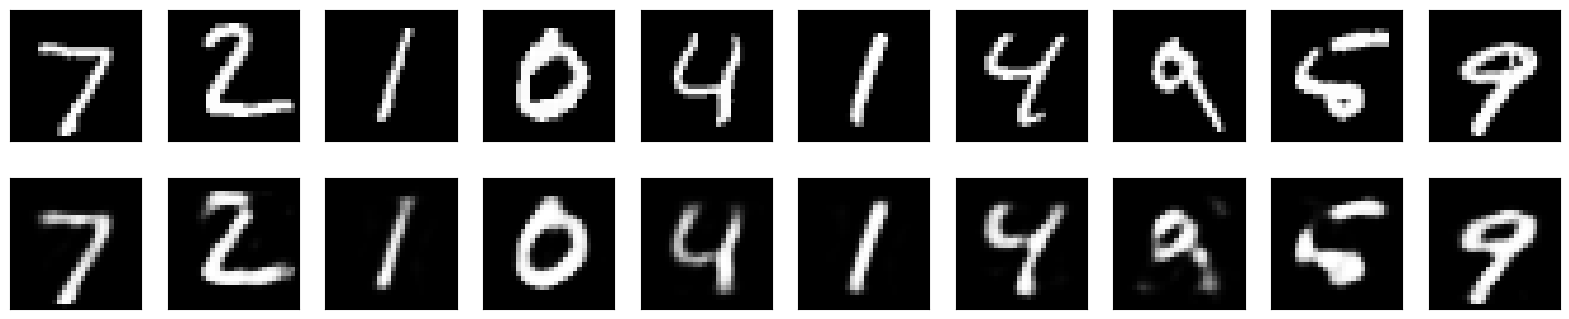

In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the data to a range between 0 and 1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape the data to a 1D array
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Define the input layer
input_layer = Input(shape=(784,))

# Define the encoding layer with a smaller dimensionality
encoding_layer = Dense(32, activation='relu')(input_layer)

# Define the decoding layer to reconstruct the original data
decoding_layer = Dense(784, activation='sigmoid')(encoding_layer)

# Define the autoencoder model
autoencoder = Model(input_layer, decoding_layer)

# Compile the model with binary crossentropy loss and Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Predict the reconstructed data from the test set
reconstructed_imgs = autoencoder.predict(X_test)

# Plot some original and reconstructed images from the test set
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
